# (fordgobike-tripdata)


## by (Reem Ashraf Salah)¶

## Preliminary Wrangling

fordgobike-tripdata is dataset for bike trips in 2/2019 which have some features like user gender , user type , day and location of trip  and timestamp

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
import scipy as s
import numpy as np

## Reading the Data into pandas dataframe 

In [2]:
df = pd.read_csv('fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Exploring the Data

In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

## Cleaning of Data 

In [7]:
df.dropna(subset = ['start_station_id','start_station_name','end_station_id','end_station_name','member_gender','member_birth_year'], inplace = True)
print(df.isnull().sum())
print(df.shape)


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64
(174952, 16)


### 1. Conversion of start and end time to datetime 

In [8]:
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

In [9]:
df['member_birth_year'] = df['member_birth_year'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  float64       
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  float64       
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int64         
 12  user_type       

### 2. Getting the required new columns 

In [10]:
df['age'] = 2019 - df['member_birth_year']
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60


In [11]:
df['dayOfWeek'] = df['start_time'].dt.day_name()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,dayOfWeek
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,Thursday
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,Thursday
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,Thursday
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,Thursday
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,Thursday


In [12]:
df['monthOfYear'] = df['start_time'].dt.month_name()
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,dayOfWeek,monthOfYear
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35,Thursday,February
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47,Thursday,February
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30,Thursday,February
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45,Thursday,February
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60,Thursday,February


### What is the structure of your dataset?


##### Trip Duration (seconds) 
##### Start Time and Date 
##### Stop Time and Date 
##### Start Station Name 
##### End Station Name 
##### Station ID 
##### Station Lat
##### Station Long 
##### Bike ID 
##### User Type
##### Gender
##### Year of Birth



### What is/are the main feature(s) of interest in your dataset?

##### gender , duration , age , !

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

##### gender , typeofcustomer , duration and dayOfWeek 

## Univariate Columns Exploration

### 1. Age

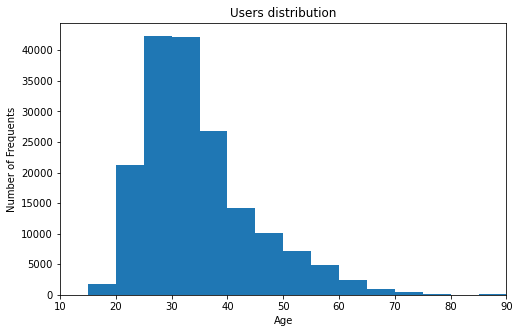

In [13]:
bins = np.arange(0, df['age'].max(), 5)
plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'age', bins = bins)
plt.xlim([10,90])
plt.xlabel('Age')
plt.ylabel('Number of Frequents')
plt.title('Users distribution')
plt.show()

##### this means the almost all riders are of age from  25 to 35 years old

### 2. Gender

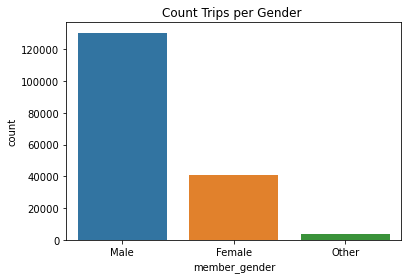

In [14]:
sb.countplot(data= df , x = 'member_gender' , order = df.member_gender.value_counts().index).set_title('Count Trips per Gender ')
plt.show()

##### this indicate that most of riders are mens as more than 50% of records are males 

### 3.Trip Duration

Text(0.5, 1.0, 'Trip Duration in Seconds distribution')

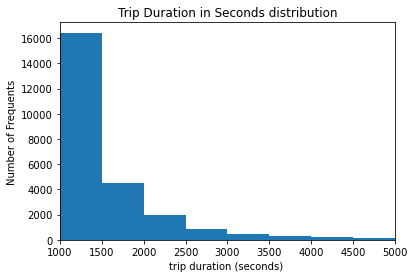

In [15]:
plt.hist(df['duration_sec'] , bins = np.arange(1000,df['duration_sec'].max()+500,500))
plt.xlim([1000,5000])
plt.xlabel('trip duration (seconds) ')
plt.ylabel('Number of Frequents')
plt.title('Trip Duration in Seconds distribution')

#####  this indicates that most trips takes about 1000 to 1500 seconds as average and as trip duratio decrease trip becomes more useful .

### 4. UserType

Text(0.5, 1.0, 'Users distribution')

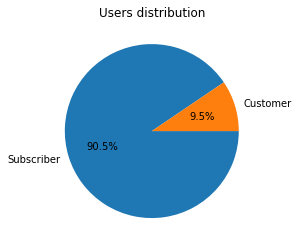

In [16]:
usertype_counts = df.user_type.value_counts()
plt.pie(usertype_counts, labels = ["Subscriber","Customer"], counterclock = False, autopct='%1.1f%%')
plt.title('Users distribution')

##### this means that almost all the riders are Subscribers 

### 5. Number of Trips per day

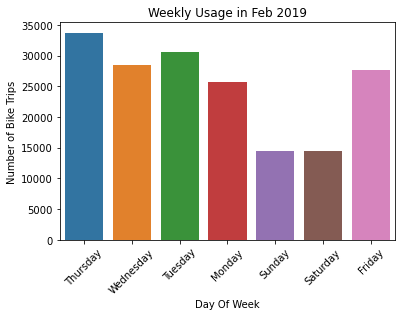

In [17]:
sb.countplot(data = df, x='dayOfWeek')
plt.xlabel('Day Of Week')
plt.ylabel('Number of Bike Trips')
plt.xticks(rotation=45)
plt.title('Weekly Usage in Feb 2019')
plt.show()

### 6. bike_share_for_all_trip

Text(0.5, 1.0, 'bike_share distribution')

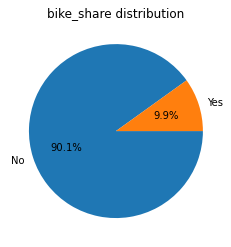

In [18]:
BikeShared_counts = df.bike_share_for_all_trip.value_counts()
plt.pie(BikeShared_counts, labels = ["No","Yes"], counterclock = False, autopct='%1.1f%%')
plt.title('bike_share distribution') 

##### this indicates the most riders doesn't shared their bike 

Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?



##### Most Users are subscriber (90.5%) , while customer are 9.5% of the users .
##### Most Users are of age 35.
#### Most of bikes is n't shared during trip


Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


#####  Most users are males and weekends no of trips decreased (sunday and saturday) 

## Bivariate Columns Exploration

### 7. average trip_duration per Gender

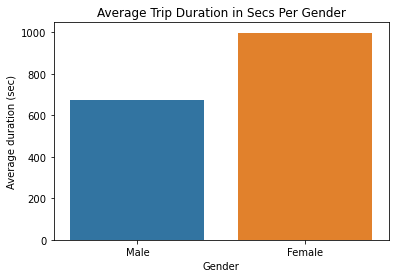

In [19]:
genderDF = df.groupby('member_gender').mean()
genderDF = genderDF.reset_index()
genderDF=genderDF.drop( 0)

sb.barplot(data=genderDF, x=["Male","Female"], y='duration_sec')

plt.title('Average Trip Duration in Secs Per Gender');
                  
plt.xlabel('Gender')
plt.ylabel('Average duration (sec)');

### 8. average trip_duration Per day 

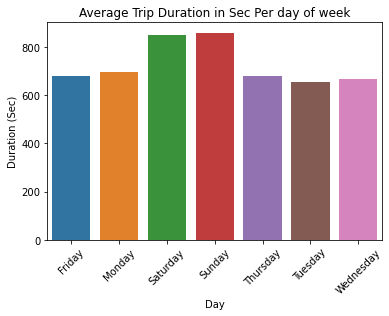

In [20]:
dayDF = df.groupby('dayOfWeek').mean()

dayDF = dayDF.reset_index()

sb.barplot(data=dayDF, x='dayOfWeek', y='duration_sec')

plt.title('Average Trip Duration in Sec Per day of week');
plt.xticks(rotation=45);    
plt.xlabel('Day');
plt.ylabel('Duration (Sec)')
plt.show()

##### this indicate that average trip duration is the same even in weekends which have low number of trips 

Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

##### On average, Customers make significantly longer trips in duration are Females .


Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


##### The average duration is almost the same, even in weekends which have low number of trips.

## Multivariate Columns Exploration

#### 9. relation between trip_duration , hour of day and gender 

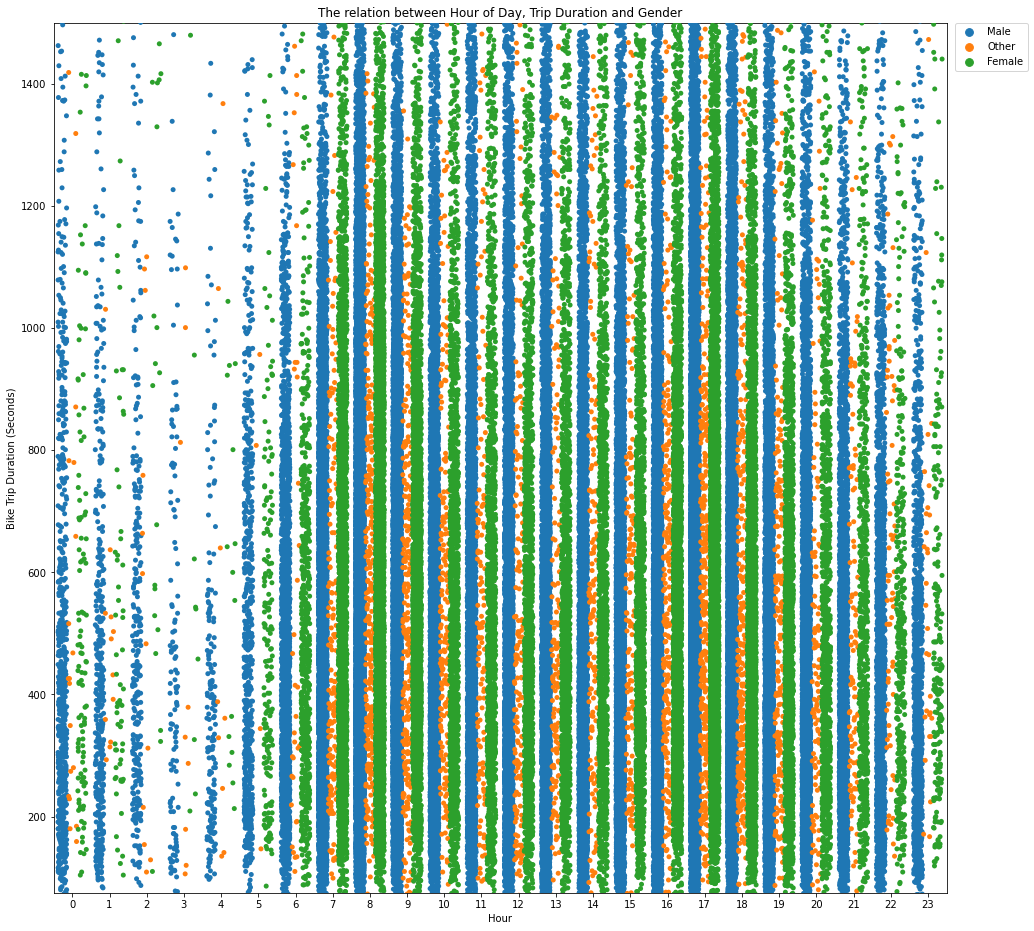

In [21]:
plt.figure(figsize =[16, 16])
ax =sb.stripplot(data =df, x=df.start_time.dt.hour  , y='duration_sec', hue = 'member_gender', jitter= 0.35, dodge =True)

plt.ylim(75,1500);

plt.title('The relation between Hour of Day, Trip Duration and Gender')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.xlabel("Hour");
plt.ylabel("Bike Trip Duration (Seconds)");

Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


###### From 6 am to 6 pm the majority of the bike users who take longer trips are Males 


Were there any interesting or surprising interactions between features?

##### The interaction between trip duration hour and gender was surprising .